In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split

# Linear Regression

- Our goal is to model the relationship between one or multiple features (independent variable: $x$) and a continuous target variable (depdendent variable : $y$)  
  
  
- We want to train a linear model to make predictions by simply computing a weighted sum of our input features, plus a constant bias term (intercept). You may be familiar with this expression:   
  
  
$$y_i = \beta_0 +\beta_1x_i + \epsilon_i, i = 1,2,...,n, \text{where } \epsilon_i \sim N(0,\sigma^{2})$$ 
  
  

- While $\epsilon_i \sim N(0,\sigma^{2})$ may look unfamilar it is simply indicating the addition of gausian noise in our regression.
- Now, we must decide how we are going to represent hypotheses ($h_\theta$) in a computer to perform supervised learning tasks. 


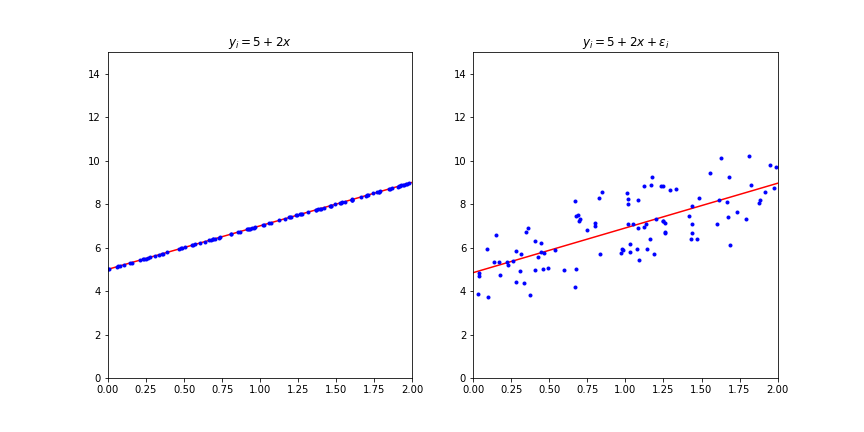

In [2]:
Image('/Users/garethbayvel/Desktop/Supevised_Learning_Series/fig.png')

## Simple Linear Regression

- The goal of univariate linear regression (simple) is to model the relationship between a single varaible (independent variable: $x$) and a continuous (independent variable: $x$).   
  
  
- While we expressed this relationship above as: $y_i = \beta_0 +\beta_1x_i$ i prefer the expression below.  
  
  
- Lets say we approximate y as a linear function of x:

$$h_\theta(x) = \theta_0 + \theta_1x_1$$

- $\theta_0 $ represents the y-axis intercept and $\theta_1$ is the weight coefficient of the independent variabe.
  
  
  
- The othogonal lines from the regression line to the sample points are the least squared residuals (errors) of our prediction.  
  
  
- Our best-fitting line is the regression line that minimises those residuals. 


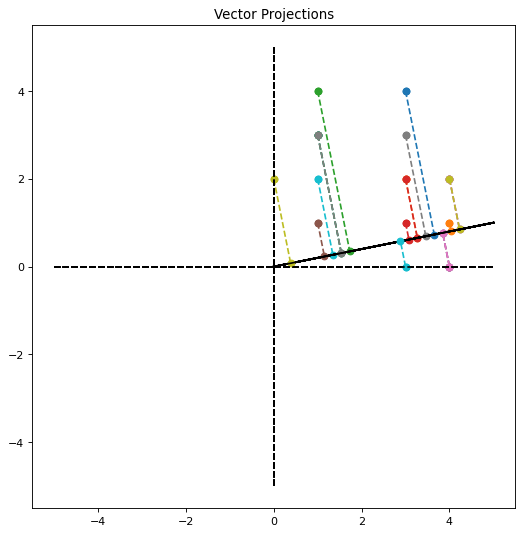

In [13]:
# This is for visualization purposes and the formula will make sense later on
a = np.array([5,1])
points = np.random.randint(5,size=[20,2])
plt.figure(figsize=[8, 8], dpi=80)
for i in points:
    beta = (a.T@i) / (a.T@a)
    plt.plot([0,a[0]],[0,a[1]],'black')
    plt.scatter(i[0],i[1])
    plt.plot([i[0], beta*a[0]],[i[1], beta*a[1]],'o--')
    plt.plot([-5,5],[0,0],'k--')
    plt.plot([0,0],[-5,5],'k--')
    plt.grid()
    plt.axis('square')
    plt.title('Vector Projections')

# Multiple Linear Regression

Model the relationship between multiple explanatory features (independent variable:  𝑥 ) and one continuous target variable (depdendent variable :  𝑦 )

### Hypothesis

$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$$

- $\hat{y}$ : our predicted value 
- n : the number of explanatory features
- $\theta$ : model parameters

To simplify our notation, we let $x_0$ = 1 (intercept terms) and write our hypothesis interms of its vectorised form:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$  
  
  
$$= \sum_{i=1}^{n}\theta_ix_i $$  
  
  
$$= \theta^{T}x$$

$$h_\theta(x) = \theta^{T}x$$

- $\theta$ : parameter vector containing bias term and feature weights ($\theta_0$ to $\theta_n$)  
  
  
- x : feature vector containing $x_0$ to $x_n$  
  
  
- $\theta^{T}x$ : is the dot product of the vectors $\theta$ and x


$$\theta^{T}x =  \begin{bmatrix}
        \theta_0& \theta_1 &\cdots &\theta_n
     \end{bmatrix}
     \begin{bmatrix}
        x_0\\[0.1em]
        x_1\\[0.1em]
       \vdots\\[0.1em]
       x_n
     \end{bmatrix}$$

## Cost Function

- Now how do we train our Linear Regression model?  
  
  
- Training a model requires setting its parameters so that the model best fits the training data (but does not overfit it).   
  
  
- How do we choose our paramaters $\theta$?  
  
  
- We need to measure how well/poorly the model fits the training data.   
  
  
- We would endevour to make $h(x)$ as close to y for our training examples.  
  
  
- Therefore, to train a Linear Regression Model, we will define a function that measures, for each value of the $\theta$, how close $h(x^{i})$ are to the corresponding $y^i$ using the least squares cost function that gives rise to the ordinary least squares regression model

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

Vectorised form: 
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)})^2$$


## Derivative of our Cost Function 

- Single Training Example partial derivative 

$$\frac{\partial}{\partial\theta_j} J(\theta) = \frac{\partial}{\partial\theta_j} \frac{1}{2m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

$$ = 2.\frac{1}{2m}(h_\theta(x^{(i)}) - y^{(i)}).  \frac{\partial}{\partial\theta_j}(h_\theta(x^{(i)}) - y^{(i)})$$

$$ = (h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial}{\partial\theta_j}(\sum_{i=0}^{n}(\theta_ix_i - y))$$


$$ = (h(\theta)(x) - y)x_j$$

$$ = X^{T}(X\theta - y)$$

- Partial Derivative of the cost function
$$\frac{\partial}{\partial\theta_j} J(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)}))x^{i}_j$$

Instead of computing these partial derivatives individually we can use the gradient vector below to compute them all at once. Where the gradient vector contains al the partial derivatives of the cost function:

$$\nabla_\theta J(\theta) = 
 \begin{pmatrix}
   \frac{\partial}{\partial\theta_0}J(\theta)\\
  \frac{\partial}{\partial\theta_1}J(\theta)\\
  \vdots  \\
  \frac{\partial}{\partial\theta_n}J(\theta)
 \end{pmatrix}
 = \frac{2}{m}X^{T}(X\theta - y)$$


## Gradient Descent 
- Measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient.   
  
  
- Luckily our cost function is a convex function with one global minima (regarding local min/maxima issues)  
  
  
- Our goal with gradient descent is to find the optimal weights: minimize the loss
function we’ve defined for the model (iteratively update our weight vector)
$$\theta_j:= \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta) $$
- $\alpha$ : is our learning rate. Size of steps we wish to take

Using our gradient vector:
$$\theta_j:= \theta_j - \alpha\nabla_\theta J(\theta)$$


Our cost function is convex meaning it has a global minima/maxima and will always converge provided we select our learning rate correclty.

Text(0.5, 1.0, 'Convex (bowl shaped)')

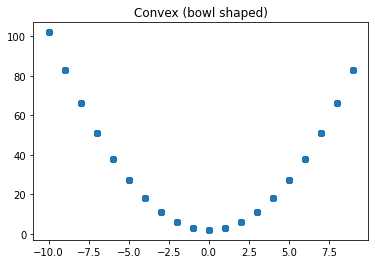

In [69]:
x = np.random.randint(-10,10,size = [1000])
y = 2+x*x
plt.scatter(x,y)
plt.title('Convex (bowl shaped)')

### Python Implementation
- When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

In [54]:
def graident_descent(X,y):
    X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
    m = len(X) 
    learning_rate = 0.005 #learning rate determines the rate at which steps are taken
    iterations = 100
    penalty = 0
    theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation mx1 column vector
    
    for iteration in range(iterations):
        gradient = 2/m * X_with_intercept.T.dot(X_with_intercept.dot(theta) 
                                                - y.reshape(-1,1)) #partial derivative gradient vector
        theta = theta - learning_rate * gradient
graident_descent(X,y)    
    

# Stochastic Gradient Descent
- Batch is suboptimal since it uses the whole training set (comutationally taxing)
  
  
- While Stochastic may bounce around, this randomness helps escape local min  
  
  
- In order to get the algorithym to settle down we must implement a learning schedule however we must ensure our training data is randomised otherwise we will be sorting by label as it would be in order  
  
  
- The most simple way is to make a pipeline  
  
  
- reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) 


In [76]:
n_epochs = 50 # m iterations and we call them epochs. akin to the n iterations in batch
m = len(X) 
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# Closed Form Solution
While Gradient Descent is one way of minimizing $J(\theta)$ we can also use linear algebra to perfrom the minimization explicitly and without resorting to an interative algorithm.
Normal Equation:
$$\hat{\theta} = (X^TX)^{-1}X^{T}y$$

- The Normal Equation will not work if $X^{T}X$ is not invertable 
  
  
- The invserse of $X^{T}X$ is an $(n + 1) × (n + 1)$ matrix.   
  
  
- The computational complexitiy of such a matrix invertion is about $O(n^{2.4})$ to $O(n^3)$
  
  

- You will see below that our closed-form solution is the projection of our points onto a n-dimentional hyperplane/subpace



###### Linear Projection

Projection equation:
$$ (b-a\beta)$$

- $\beta$ is our scaler and the point is that we want a scaled version of this line to be as close to b without leaving the line. Therefore, the closest point would be where $b$ meets $a$ at a 90 degree angle.

If **b** is orthogonal/perpendicular to **$a\beta$** we know that their dot prodict must equal zero:
$$ a^{T}(b-a\beta) = 0$$
$$ a^{T}b - a^{T}a\beta = 0$$
$$ a^{T}a\beta = a^{T}b $$

Because we are dealing with dot products of vectors we can divide them (cannot divide matrices):

$$ \beta = \frac{a^{T}b}{a^{T}a} $$


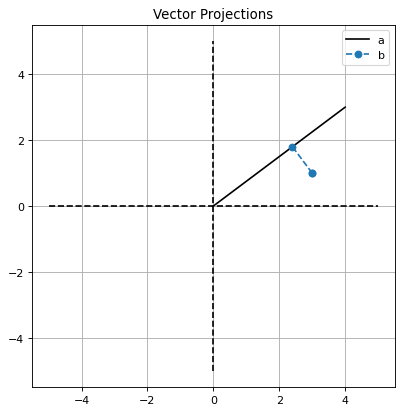

In [2]:
a = np.array([4,3])
b = np.array([3,1])
plt.figure(figsize=(8, 6), dpi=80)

beta = (a.T@b) / (a.T@a)
plt.plot([0,a[0]],[0,a[1]],'black')
plt.scatter(b[0],b[1])
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'o--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[-5,5],'k--')
plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend(['a','b'])

###### Left Inverse
For the equation $Ax = b$ if matrix A is not square but it is a tall skinny full column rank matrix we can take its left inverse. In order to make A equal the identity matrix we do the following:

$$A = \begin{pmatrix}
   \vdots \vdots\\
  \vdots \vdots\\
  \vdots \vdots\\
  \\
 \end{pmatrix}_{mxn}
 = (A^{T}A) = \begin{pmatrix}
   \vdots \vdots\vdots\vdots\\
  \vdots \vdots\vdots\vdots\\
  \vdots \vdots\vdots\vdots\\
 \end{pmatrix}_{nxn}$$
 
- $A^{T}A$ is invertable so we take the left inverse $(A^{T}A)^{-1}$ while placing it on the left and the equation below provides the Indentity matrix

$$(A^{T}A)^{-1} (A^{T}A) = I$$

##### Projection onto a subspace
Projection equation:
$$ A^{T}(b-Ax) = 0$$
$$ A^{T}b - A^{T}Ax = 0$$
$$ A^{T}Ax = A^{T}b $$
$$ A^{T}Ax = A^{T}b $$

- Now we cannot divide matrices but we can take the left inverse

$$ (A^{T}A)^{-1}A^{T}Ax = (A^{T}A)^{-1} A^{T}b $$
$$ x = (A^{T}A)^{-1} A^{T}b $$

$$  = (A^{T}A)^{-1} A^{T}b $$

$$\hat{\theta} = (X^TX)^{-1}X^{T}y$$

- Therefore, our closed-form solution is the projection of our points onto a n-dimentional hyperplaine


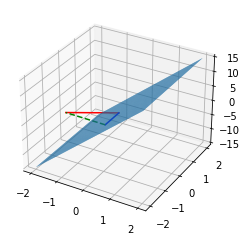

In [7]:
m = 3
n = 2

b = np.random.randn(m,1)
A = np.random.randn(m,n)

x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

fig= plt.figure(figsize = plt.figaspect(1))
ax = fig.gca(projection = '3d')

ax.plot([0,b[0]],[0,b[1]],[0,b[2]],'r')
ax.plot([0,Ax[0]],[0,Ax[1]],[0,Ax[2]],'b')

ax.plot([Ax[0][0],b[0]],
       [Ax[1][0],b[1]],
       [Ax[2][0],b[2]],'g--')

xx,yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

### Implementation
#### Linear Equation (y = mx + x) with gausian noise

In [72]:
X = 2*np.random.rand(100,1)
y = 5+2*X+np.random.randn(100,1)
x_b = np.c_[np.ones((100,1)),X] # add x(theta) = 1 to each instance

In [76]:
theta_best = np.linalg.inv(x_b.T.dot(x_b))@x_b.T@y
theta_best # close to our intercept of 5 and slope of 2 with added gausian noise

array([[4.78786756],
       [2.20044999]])

- Our intercept of 4.78 and beta value of 2.2 are clearly close to our equation above 5 and 2. 
  
  
  
- You can see the divergence is caused by our gausian noise

In [74]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.78786756],
       [9.18876753]])

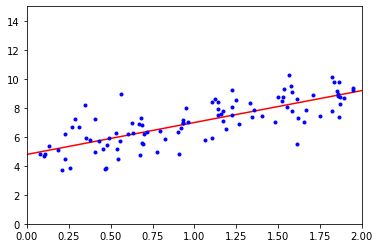

In [75]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Ridge Regression
- Regularized version of Linear Regression adding a regularized/penalty term to the cost function:  
  
  
 $$\lambda\sum_{i=1}^{n}\theta^{2}_i$$
      
      
- Regularization only added during training  
  
  
- $\lambda$ : controls amount of regularization  
  
  
- If $\lambda$ is 0 then ridge regression simply equals Linear Regression  
  
  
- If $\lambda$ is very high then all weights end up very close to zero.

#### Ridge Regression Cost Function

$$ J(\theta) = \frac{1}{2m}[\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)})^2 + \lambda \sum_{j=1}^{n}\theta^{2}_i]$$

- Notaby, $\theta_0$ is not regularized

$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)}))x^{i}_0$$

$$\theta_j := \theta_j - \alpha[\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)}))x^{i}_j - \frac{\lambda}{m}\theta_j]$$

###### Gradient Descent Update Rule
$$\theta_j := \theta_j(1-\alpha\frac{\lambda}{m})- \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)}))x^{i}_j $$




### Python Implementation

In [56]:
def ridge_graident_descent(X,y):
    X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
    m = len(X) 
    learning_rate = 0.005 #learning rate determines the rate at which steps are taken
    iterations = 100
    penalty = 0
    theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation mx1 column vector
    
    for iteration in range(iterations):
        gradient = 2/m * X_with_intercept.T.dot(X_with_intercept.dot(theta) 
                                                - y.reshape(-1,1)) #partial derivative gradient vector
        gradient[1:] +=penalty * theta[1:] # Optional RIDGE REGRESSION add regularized term to cost function 
        theta = theta - learning_rate * gradient
ridge_graident_descent(X,y)    


# Matrix Decomposition
$$A = CR$$
$$A = LU$$ 
$$A = V \Lambda V^{-1}$$
$$S = Q \Lambda Q^{T}$$
$$A = U \Sigma V^{T}$$

- Orthonormal means unit length and orthogonal denoted as $Q$
$$Q^{-1} = Q^{T}$$
$$QQ^{-1} = QQ^{T} = Q^{-1}Q = Q^{T}Q$$

# Singular Value Decomposition (SVD)

- Decompositing our X matrix and represent it as a product of three differnet matrices
  
  
- Normally the starting point for data reduction  
  
  
- Use it to solve linear systems of equation $Ax = b$ for non-square $A$ matrices  
  
  
- Basis for Principal component analysis

$$\overline{\underline{X}} = \begin{bmatrix}
        \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       x_1 & x_2    & \cdots       & x_m \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots 
     \end{bmatrix}_{mxn} = U \Sigma V^{T} =  \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       u_1 & u_2    & \cdots       & u_n \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots
     \end{bmatrix} _{nxn} = \begin{bmatrix}
       \sigma_1 &   &            \\[0.3em]
       & \ddots    &    \\[0.3em]
       & & \sigma_m\\[0.3em]
       \hline
       & 0 
     \end{bmatrix} _{nxm} = \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       v_1 & v_2  & \cdots &v_m           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots    
     \end{bmatrix} _{mxm} $$
     
- $U$ forms the orthonormal basis of the column space of $\overline{\underline{X}}$ and is hierarchically ordered by importance in terms of their ability to describe the variance in the columns of $\overline{\underline{X}}$. It is comprised of the eigenvalues of $\overline{\underline{X}}^{T}\overline{\underline{X}}$.
- $\Sigma$ is a diagonal matrix that is hierarchically ordered eigenvalues. Symetric and positive definite meaning we will have n postive real eigenvalues
- $V$ forms the orthonormal basis of the row space of $\overline{\underline{X}}$ and is hierarchically ordered. It provides the eigen mixture of $U$ that adds up to $\overline{\underline{X}}$ scaled by $\Sigma$. It is comprised of the eigenvalues of $\overline{\underline{X}}\overline{\underline{X}}^{T}$.

Important to know:  

$$UU^{T} = U^{T}U = I$$
  
$$VV^{T} = V^{T}V = I$$

We can represent the matrix products of our three matrices as a sum of rank 1 matrices:

$$= \sigma_1 u_1 v^{T}_1 + \sigma_2 u_2 v^{T}_2 + \cdots + \sigma_m u_m v^{T}_m + 0$$
- Below is our best rank 1 approximation of $\overline{\underline{X}}$ 
$$\sigma_1 \begin{bmatrix}
        \vdots \\[0.1em]
       \vdots\\[0.1em]
       u_1\\[0.1em]
       \vdots
     \end{bmatrix} \begin{bmatrix}
        \cdots &  \cdots & v^{T}_1 & \cdots\\
     \end{bmatrix}$$

 

- There are only $m$ non-zero singular values $\Sigma$ because $\overline{\underline{X}}$ can only have atmost rank m  
  
  
- This means we can just select the first m columns of $U$, $mxm$ block of $\Sigma$ and $nxm$ V  
  
  
$$\overline{\underline{X}} = U \Sigma V^{T} = \hat{U} \hat{\Sigma} V^{T}$$

- Where $ \hat{U} \hat{\Sigma} V^{T}$ is just the first $m$ columns. This is called the **economy SVD**  
  
  
- We are assuming tall skinny matrix


### Truncation
- Additionally we can truncate at r (throw away all the low energy $\sigma$ values)  
  
  
- Only keeping the first $r$ columns of $U$ and $r$ columns of $V$ and a $rxr$ submatrix of $\Sigma$ 

$$\approx \tilde{U} \tilde{\Sigma} \tilde{V}^{T}$$

- This is the best rank r approximation of $\overline{\underline{X}}$

Very Important that after truncation:
$$\tilde{U}^{T}\tilde{U} = I$$
$$\tilde{U}\tilde{U}^{T} \neq I$$



# Dominant Correllations
- This is our correllation matrix among the columns of $\overline{\underline{X}}$
$$\overline{\underline{X}}^{T}\overline{\underline{X}} = \begin{bmatrix}
        \cdots & \cdots & x^{T}_1 & \cdots & \cdots  \\[0.1em]
       \cdots & \cdots & x^{T}_2 & \cdots & \cdots  \\[0.1em]
       & &\vdots & &   
     \end{bmatrix} \begin{bmatrix}
        \vdots &  \vdots & \vdots\\
        \vdots &  \vdots & \vdots\\
        x_1 & x_2 & \cdots \\
        \vdots & \vdots  & \vdots\\
        \vdots & \vdots  & \vdots\\
     \end{bmatrix}$$
     
$$ = \begin{bmatrix}
        x^{T}_1x_1 &  x^{T}_1x_2 & \cdots & x^{T}_1x_m\\
        x^{T}_0x_1 &  x^{T}_2x_2 & \cdots & x^{T}_2x_m\\
        \vdots & \vdots & \ddots &\vdots \\
        x^{T}_mx_1 &  x^{T}_mx_2 & \cdots & x^{T}_mx_m
     \end{bmatrix} $$
     
$$x^{T}_i x_j = \langle x_i,x_j \rangle$$

- Every entry is just the inner product of the corresponding two columns of $\overline{\underline{X}}$  
  
  
- The larger the inner product the more similar  
  
  
- Small inner product means the columns are nearly orthogonal and different  
  
  
- Since $\overline{\underline{X}}^{T}\overline{\underline{X}}$ is symmetric and positive semi-defininte because they are inner products: we will have non-negative real eigenvalues

### Finding $U \Sigma V$ for the economy SVD
$$\overline{\underline{X}}^{T} = V \hat{\Sigma} \hat{U}^{T}$$

$$\overline{\underline{X}}^{T}\overline{\underline{X}} = V \hat{\Sigma} \hat{U}^{T} \hat{U} \hat{\Sigma} V^{T} = V \hat{\Sigma}^{2} V^{T}$$

- This is the expression for the eigendecomposition of our correllation matrix  
  
  
- Where $\Sigma$ are our eigenvalues of our correllation matrix and $\Sigma$ and $V$ are our eigenvectors from our correllation matrix

#### Intuition (Computing SVD this way is inefficent but this is a good guide to understanding)

- The right singular values for $V$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the square roots of the same eigenvalues of the columnwise correllation matrix

$$\overline{\underline{X}}\overline{\underline{X}}^{T} = \hat{U} \hat{\Sigma} V^{T}  \hat{\Sigma} \hat{U}^{T} = \hat{U} \hat{\Sigma}^{2} \hat{U}^{T}$$

- The left singular values for $U$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the same square roots of the same eigenvalues of the columnwise correllation matrix



## Pseudoinverse
- Solving linear systems where $A$ and $b$ are known
$$Ax = b$$
$$A^{-1}Ax = A^{-1}b$$
$$x = A^{-1}b$$

- This only works where $A$ is a square and invertable matrix
- SVD allows us to generalise to non-sqaure $A$ matrices

Two common forms of our $A$ Matrix:

- Short and Fat (Underdetermined)
$$\begin{bmatrix}
       & & & & & & \\[0.1em]
       & & A & & \\[0.1em]
       & &  & &  \\
       & & & & & \\[0.1em]
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        \\[0.01em]
         \\[0.01em]
        \\[0.01em]
        x\\
        \\
        \\
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
     \end{bmatrix}$$
- There is not enough measurements in b to uniquely determine a single unique solution x
- Therefore, there will be $\infty$ many solution x given b

Tall and Skinny (Overderdetermined)
$$\begin{bmatrix}
        & & & &  \\[0.1em]
       & & A &  \\[0.1em]
       & & & &  \\
       & & & &  \\[0.1em]
       & & & &  \\
       & & & &  \\
       & & & & 
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        x
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
        \\
        \\
         \\
     \end{bmatrix}$$
- There will be zero solution in general for x given b


#### Moore Penrose Pseudoinverse (showing left pseudoinverse)
SVD will allow us to approximatly inverse this $A$ matrix (pseudoinverse) and find a best fit x that comes close to solve this equation or solves the equation with the min $\| x \|_2$.
- Assuming economy SVD
$$A = U \Sigma V^{T} = A^{\dagger} = V \Sigma^{-1} U^{T}$$

$$Ax = b$$

$$U \Sigma V^{T}x = b $$

$$V \Sigma^{-1} U^{T} U \Sigma V^{T}x = V \Sigma^{-1} U^{T}b $$

$$ \tilde{x} = V \Sigma^{-1} U^{T}b $$

$$ : = A^{\dagger}b $$

- Beacuse matrix $A$ is not square or full rank a proper inverse does not exist and the Moore Penrose Pseudoinverse is as close as we will get to inverting that $A$ matrix

Underdetermined:
- min $\| \hat{x} \|_2\text{ s.t }A\tilde{x} =b$ is given by the solution $ : = A^{\dagger}b $
- $ : = A^{\dagger}b $ is an actual solution for the underdetermined case


Overderdetermined:
- Least Squares solution
min $\|A\tilde{x}-b\|_2$
- $ A^{\dagger}b $ is the solution that minimises the error of $\|A\tilde{x}-b\|_2$
- To understand why $ : = A^{\dagger}b $ is not an exact solution:

$$A\tilde{x} = \hat{U} \hat{\Sigma} \hat{V}^{T}\hat{V} \hat{\Sigma}^{-1} \hat{U}^{T}b$$
$$\Sigma \Sigma^{-1} = I $$
$$V^{T}V= I $$
$$UU^{T} \neq I $$

$$ = \hat{U}\hat{U}^{T}b$$
- This is the equation for the projection of b onto the span of the columns of $\hat{U}$ which is equal to the span of the columns of $A$  
  
  
- $Ax = b$ can only be solved when b is in the col(A)  
  
  
- Therefore the best least squares solution $A\tilde{x}$ is taking b and projecting it onto the column of $A$

###### Projection onto a subspace
Remember the projection equation:
$$\hat{\theta} = X(X^TX)^{-1}X^{T}y$$

- If X is orthonormal the equation becomes $U(U^TU)^{-1}U^{T}y$

$$=(U^TU)^{-1} = (U^{-1}U) = I$$

$$ = UU^{T}y$$

- $UU^{T}y$ is the orthonormal projection onto a subspace 




### The Best Fit $x$ (Best Fit Slope) to solve $Ax = b$
$$\tilde{x} = \frac{a^{T}b}{\|a\|_2}$$

- I wonder where we have seen this equation from (linear projections)
  
  
- $a^{T}b$ Taking all the b data and projecting into the direction  
  
  
- $ \frac{a^{T}b}{\|a\|_2}$ normailzing both vectors by its length

### Python Implementation

In [77]:
def SVD(X,y):
    X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
    U, S, V = np.linalg.svd(X_with_intercept,full_matrices=False) #NB python svd returns V.T
    """pseudoinverse if underdetermined n<m (infinitely many solutions) or overdetermined n>m (no solution) 
            or if some features are redundant the pseudoinverse is always defined.pseudoinverse for Linear regression 
            Formula: V.T@np.linalg.inv(np.diag(S))@U.T@y """
    xtilde = V.T@(np.linalg.inv(np.diag(S)@np.diag(S)+self.penalty))@np.diag(S)@U.T@y # Ridge regression  
    """This formula uses Ridge Regression as a regularized version of Linreg adding a regularised term
    to the cost function"""


### Linear Regression 
#### Using SVD, Batch Gradient Descent and Stochastic Gradient descent with the option of imposing L2 norm penalty

In [78]:
X,y = make_regression(n_features=1,noise=20)

In [79]:
class Linear_reg():
    #include solver parameter for flexible implementation
    def __init__(self,solver='svd',max_iter=2000,learning_rate=0.01,penalty = 0,epochs = 50):
        """Flexible Solver Parameters
        
        Key solvers:
        svd --- Singular Value Decomposition
            singular value decomposition where U is left singular values (eigenvectors) orthonormal 
            and in the column space of x, S (sigma) is eigenvalues of either U or V diagonalised and squared rooted,
            V is the right singular values (eigenvectors) orthonormal and in the row space of x as it is transposed
            
        BGD --- Batch Gradient Descent
        SGD --- Stochastic Gradient Descent
        
        Key Parameters:
        max_iter --- number of iterations used in gradient descent methods
        
        learning_rate --- size of steps taken in gradient descent methods
        
        penalty --- imposing l2 norm regularisation known as ridge regression 
                    where penalty of 0 = standard linreg"""
        
        self.solver = solver
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.epochs = epochs

        
    def fit(self,X,y):
        X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
        self.X_intercept = X_with_intercept
        
        if self.solver == 'svd':
            
            U, S, V = np.linalg.svd(X_with_intercept,full_matrices=False) #NB python svd returns V.T
            """pseudoinverse if underdetermined n<m (infinitely many solutions) or overdetermined n>m (no solution) 
            or if some features are redundant the pseudoinverse is always defined.pseudoinverse for Linear regression 
            Formula: V.T@np.linalg.inv(np.diag(S))@U.T@y """
            
            theta = V.T@(np.linalg.inv(np.diag(S)@np.diag(S)+self.penalty))@np.diag(S)@U.T@y # Ridge regression
            """This formula uses Ridge Regression as a regularized version of Linreg adding a regularised term
            to the cost function. Theta in this instance would be xtilde"""

         
        elif self.solver == "BGD":
            """Batch Gradient Descent using partial derivative of mean squared error cost function 
               using the gradient vector instead of calculating patrital derivative individually."""
            
            theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation mx1 column vector
            m = len(X)
            
            for iteration in range(self.max_iter):
                gradient = 2/m * X_with_intercept.T.dot(X_with_intercept.dot(theta) - y.reshape(-1,1)) #partial derivative of MSE
                gradient[1:] += self.penalty * theta[1:] #RIDGE REGRESSION add regularized term to cost function 
                theta = theta - self.learning_rate * gradient
               
        
        elif self.solver == "SGD":
            t0,t1 = 5,50
            def learning_schedule(t):
                return t0/(t+t1)
            m = len(X)
            theta = np.random.randn(X_with_intercept.shape[1],1) #random initialisation
            for epoch in range(self.epochs):
                for i in range(m):
                    random_index = np.random.randint(m)
                    Xi = X_with_intercept[random_index:random_index+1]
                    Yi = y[random_index:random_index+1]
                    gradients = 2 * Xi.T.dot(Xi.dot(theta) - Yi)
                    gradients[1:] += self.penalty * theta[1:] #RIDGE REGRESSION add regularized term to cost function 
                    self.learning_rate = learning_schedule(epoch * m + i)
                    theta = theta - self.learning_rate * gradients
        
        self.theta = theta
        self.coef_ = theta[1:] # returns slope
        self.intercept_ = theta[0] # returns intercept

        return self
    
    def predict(self,X):
        x_new = np.c_[np.ones((len(X))),X]
        self.y_pred = x_new.dot(self.theta)
        return self.y_pred
    
        

In [80]:
# Split data into training and testing sets to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training model on our training data
linreg = Linear_reg(solver='svd').fit(X_train,y_train)
# Using our trained model to predict on our explanatory varaible
pred = linreg.predict(X_test) 
# Accuracy of our predictions and our model
r2_score(y_test,pred) 


0.9038362803056301

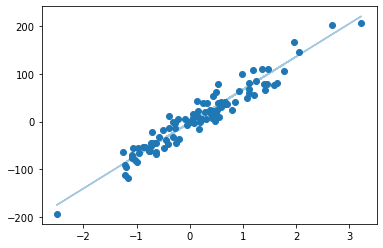

In [81]:
x_new = np.array([[0],[2]])
y_pred = linreg.predict(x_new)
plt.scatter(X,y)
plt.plot(X,linreg.intercept_ + X*linreg.coef_,alpha=0.4)

MAE: 299.46830229465195
RMSE: 372.41912356112164
Equation: y = -1158.46 + 58.53x1 + 60.25x2


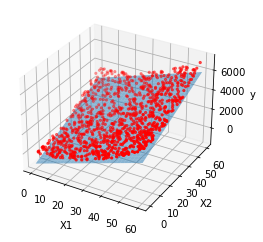

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()